<h1><center><span style="color:#6b9b95">Ensemble Models</span></center></h1>

# What is an ensemble method?
- Ensemble models in machine learning combine the decisions from multiple models to improve the overall performance.

# Simple Ensemble Techniques
## Max Voting
- classification problems
- multiple models are used to make predictions(vote) for each data point. 
- predictions by each model are considered as a 'vote'
- predictions which we get from the majority of the models are used as the final prediction

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

## Averaging
- similar to max voting, multiple predictions are made for each data point 
- average of predictions from all the models and use it to make the final prediction
- can be used in regression problems or calculating probabilities for classification

In [ ]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict_proba(x_test)
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)

finalpred=(pred1+pred2+pred3)/3

----
## Weighted Average
- extension of the averaging
- All models are assigned different weights defining the importance of each model for prediction

In [ ]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict_proba(x_test)
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)

finalpred=(pred1*0.3+pred2*0.3+pred3*0.4)

# Advanced Ensemble techniques
## Stacking
- The idea is that you can attack a learning problem with different types of models which are capable to learn some part of the problem, but not the whole space of the problem. 
- build multiple different learners and you use them to build an intermediate prediction, one prediction for each learned model. Then you add a new model which learns from the intermediate predictions to predict the same target.
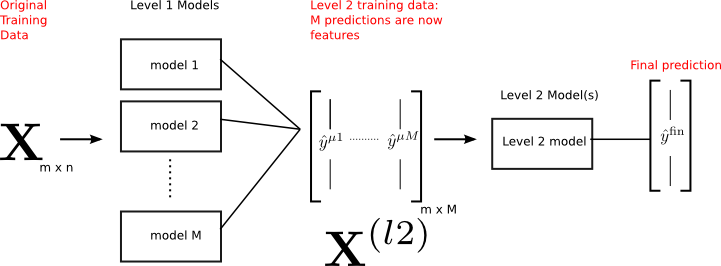

- Level-0 Models (Base-Models): Models fit on the training data and whose predictions are compiled.
- Level-1 Model (Meta-Model): Model that learns how to best combine the predictions of the base models.
### Steps
1. We split the data into two parts viz, a training set and test set. The training data is further split into K-folds just like K-fold cross-validation.
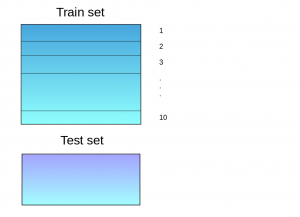
2. A base model(e.g DT) is fitted on the K-1 parts and predictions are made for the Kth part.
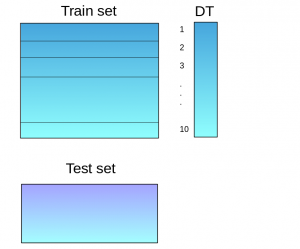
3. This process is iterated until every fold has been predicted.
4. The base model is then fitted on the whole train data set to calculate its performance on the test set.
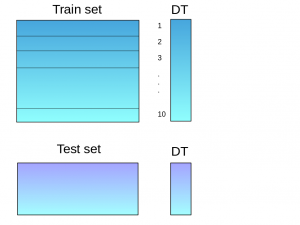
5. We repeat the last 3 steps for other base models.(e.g SVM,decision tree,neural network etc )
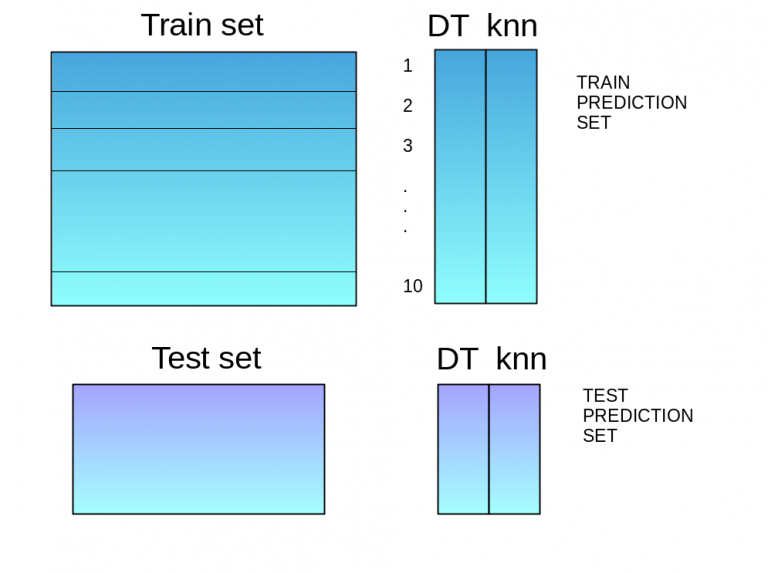
6. Predictions from the train set are used as features for the second level model.
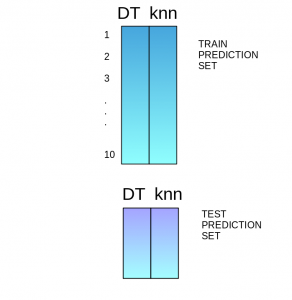
7. Second level model/ Meta Model is used to make a prediction on the test set.



In [ ]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X, y)
# make a prediction for one example
data = [[2.47475454,0.40165523,1.68081787,2.88940715,0.91704519,-3.07950644,4.39961206,0.72464273,-4.86563631,-6.06338084,-1.22209949,-0.4699618,1.01222748,-0.6899355,-0.53000581,6.86966784,-3.27211075,-6.59044146,-2.21290585,-3.139579]]
yhat = model.predict(data)
print('Predicted Class: %d' % (yhat))

----
## Blending

- help us to improve performance and increase accuracy.
- same approach as stacking but uses only a holdout (validation) set from the train set to make predictions. In other words, unlike stacking, the predictions are made on the holdout set only. 
- The holdout set and the predictions are used to build a model which is run on the test set.

### Steps
1. The train set is split into two parts, viz-training and validation sets.
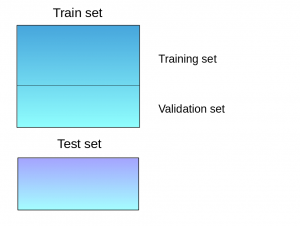
2. Model(s) are fit on the training set.
3. The predictions are made on the validation set and the test set.
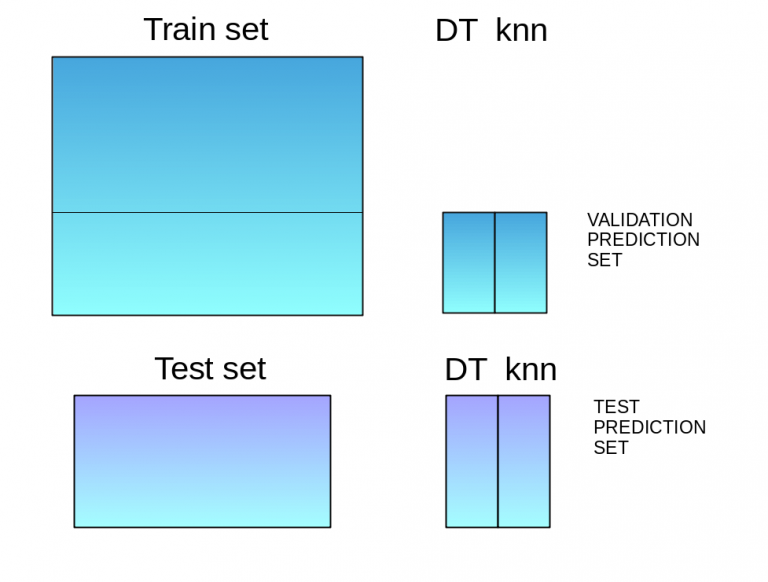
4. The validation set and its predictions are used as features to build a new model.
5. This model is used to make final predictions on the test and meta-features.

### Note
The difference between stacking and blending is that Stacking uses out-of-fold predictions for the train set of the next layer (i.e meta-model), and Blending uses a validation set (let’s say, 10-15% of the training set) to train the next layer.

----
## Bagging
- idea is combining the results of multiple models (for instance, all decision trees) to get a generalized result.
- Bootstrapping is a sampling technique in which we create subsets of observations from the original dataset, with replacement.

### Steps:
1. Multiple subsets are created from the original dataset, selecting observations with replacement.
2. A base model (weak model) is created on each of these subsets.
3. The models run in parallel and are independent of each other.
4. The final predictions are determined by combining the predictions from all the models
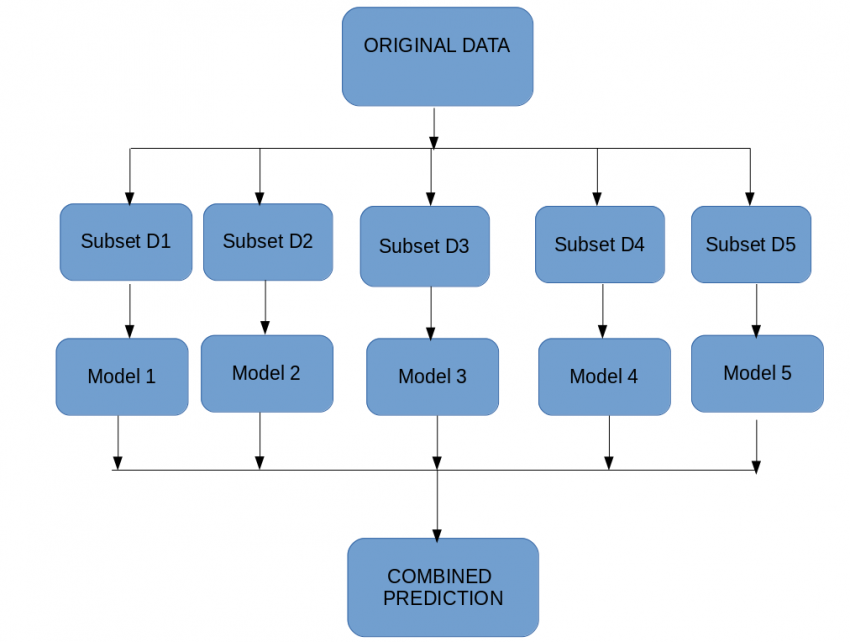

----
## Boosting
- Boosting is a sequential process, where each subsequent model attempts to correct the errors of the previous model. 
- The succeeding models are dependent on the previous model

### Steps

1. A subset is created from the original dataset.
2. Initially, all data points are given equal weights.
3. A base model is created on this subset.
4. This model is used to make predictions on the whole dataset.
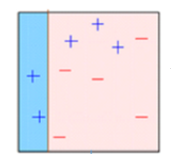
5. Errors are calculated using the actual values and predicted values.
6. The observations which are incorrectly predicted, are given higher weights.
(Here, the three misclassified blue-plus points will be given higher weights)
7. Another model is created and predictions are made on the dataset.
(This model tries to correct the errors from the previous model)
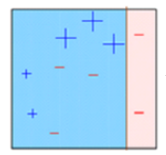
8. Similarly, multiple models are created, each correcting the errors of the previous model.
9. The final model (strong learner) is the weighted mean of all the models (weak learners).
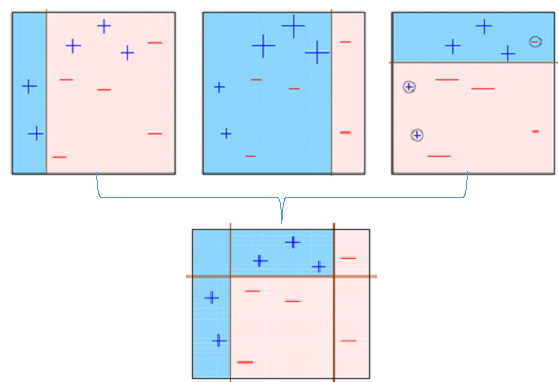
Thus, the boosting algorithm combines a number of weak learners to form a strong learner. The individual models would not perform well on the entire dataset, but they work well for some part of the dataset. Thus, each model actually boosts the performance of the ensemble.
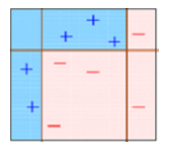

# Algorithms based on Bagging and Boosting
## Bagging meta-estimator
follows the typical bagging technique to make predictions.
1. Random subsets are created from the original dataset (Bootstrapping).
2. The subset of the dataset includes all features.
3. A user-specified base estimator is fitted on each of these smaller sets.
4. Predictions from each model are combined to get the final result.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)

## Random Forest
random forest randomly selects a set of features which are used to decide the best split at each node of the decision tree.  
1. Random subsets are created from the original dataset (bootstrapping).
2. At each node in the decision tree, only a random set of features are considered to decide the best split.
3. A decision tree model is fitted on each of the subsets.
4. The final prediction is calculated by averaging the predictions from all decision trees.

Random forest randomly selects data points and features, and builds multiple trees (Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

## AdaBoost
simplest boosting algorithms
1. Initially, all observations in the dataset are given equal weights.
2. A model is built on a subset of data.
3. Using this model, predictions are made on the whole dataset.
4. Errors are calculated by comparing the predictions and actual values.
5. While creating the next model, higher weights are given to the data points which were predicted incorrectly.
6. Weights can be determined using the error value. For instance, higher the error more is the weight assigned to the observation.
7. This process is repeated until the error function does not change, or the maximum limit of the number of estimators is reached.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)

## Gradient Boosting (GBM)
- Gradient Boosting or GBM is another ensemble machine learning algorithm that works for both regression and classification problems. 
- GBM uses the boosting technique, combining a number of weak learners to form a strong learner.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)

## XGBoost
- advanced implementation of the gradient boosting algorithm
- XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques.
- includes a variety of regularization which reduces overfitting and improves overall performance.

In [ ]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(x_train, y_train)

## Light GBM
- Light GBM beats all the other algorithms when the dataset is extremely large. 
- Compared to the other algorithms, Light GBM takes lesser time to run on a huge dataset.

In [ ]:
import lightgbm as lgb
train_data=lgb.Dataset(x_train,label=y_train)
#define parameters
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100) 
y_pred=model.predict(x_test)

## CatBoost
- CatBoost can automatically deal with categorical variables and does not require extensive data preprocessing like other machine learning algorithms.
- CatBoost algorithm effectively deals with categorical variables. Thus, you should not perform one-hot encoding for categorical variables.

In [ ]:
from catboost import CatBoostClassifier
model=CatBoostClassifier()
categorical_features_indices = np.where(df.dtypes != np.float)[0]
model.fit(x_train,y_train,cat_features=([ 0,  1, 2, 3, 4, 10]),eval_set=(x_test, y_test))
